In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

In [ ]:
red_wine = pd.read_csv("winequality-red.csv", sep=";")
white_wine = pd.read_csv("winequality-white.csv", sep=";")

In [ ]:
# Add wine type column and combine datasets
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'
combined_wine = pd.concat([red_wine, white_wine], ignore_index=True)


In [ ]:
# Check for missing values
print("Missing values in each column:\n", combined_wine.isnull().sum())


Missing values in each column:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64


In [ ]:
# Scale features
features_to_scale = combined_wine.columns[:-2]  # Exclude 'quality' and 'wine_type'
scaler = MinMaxScaler()
combined_wine[features_to_scale] = scaler.fit_transform(combined_wine[features_to_scale])

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
numerical_features = combined_wine.select_dtypes(include=np.number)
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

NameError: name 'plt' is not defined

In [ ]:
# Split data into features (X) and target (y)
X = combined_wine.drop(columns=['quality', 'wine_type'])
y = combined_wine['quality']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
# Evaluate Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - MSE: {mse_lr:.2f}, R2: {r2_lr:.2f}")


Linear Regression - MSE: 0.55, R2: 0.26


In [ ]:
# Random Forest Model (with Hyperparameter Tuning)
rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)


In [ ]:
# Evaluate Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest (Tuned) - MSE: {mse_rf:.2f}, R2: {r2_rf:.2f}")

Random Forest (Tuned) - MSE: 0.37, R2: 0.50


In [ ]:
# XGBoost Model
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [ ]:
# Evaluate XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost - MSE: {mse_xgb:.2f}, R2: {r2_xgb:.2f}")

In [ ]:
# Compare Models
print("\nModel Comparison:")
print(f"Linear Regression -> MSE: {mse_lr:.2f}, R2: {r2_lr:.2f}")
print(f"Random Forest (Tuned) -> MSE: {mse_rf:.2f}, R2: {r2_rf:.2f}")
print(f"XGBoost -> MSE: {mse_xgb:.2f}, R2: {r2_xgb:.2f}")


Model Comparison:
Linear Regression -> MSE: 0.55, R2: 0.26
Random Forest (Tuned) -> MSE: 0.37, R2: 0.50
XGBoost -> MSE: 0.40, R2: 0.46


<ipython-input-23-93b7a11b42dd>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red', label='Perfect Prediction')


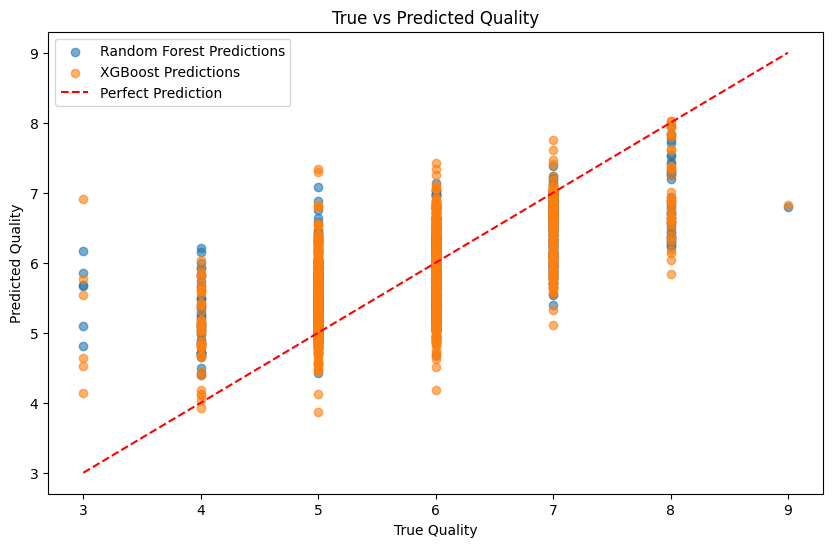

In [ ]:
# Visualization: True vs Predicted Quality (for the best model)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, label="Random Forest Predictions")
plt.scatter(y_test, y_pred_xgb, alpha=0.6, label="XGBoost Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red', label='Perfect Prediction')
plt.xlabel("True Quality")
plt.ylabel("Predicted Quality")
plt.title("True vs Predicted Quality")
plt.legend()
plt.show()

In [ ]:
# Compare the evaluation metrics for both models
print("Model Performance Metrics:\n")

# Random Forest
print(f"Random Forest (Tuned):")
print(f"  - Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"  - R² Score: {r2_rf:.2f}\n")

# XGBoost
print(f"XGBoost:")
print(f"  - Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"  - R² Score: {r2_xgb:.2f}\n")

# Determine the better model
if mse_rf < mse_xgb and r2_rf > r2_xgb:
    print("The Random Forest model performed better based on lower MSE and higher R².")
    best_model = "Random Forest"
elif mse_xgb < mse_rf and r2_xgb > r2_rf:
    print("The XGBoost model performed better based on lower MSE and higher R².")
    best_model = "XGBoost"
else:
    print("Both models performed similarly. Consider additional evaluation methods.")

# Document the results
print("\nSummary of Results:")
print(f"Best Model: {best_model}")


Model Performance Metrics:

Random Forest (Tuned):
  - Mean Squared Error (MSE): 0.37
  - R² Score: 0.50

XGBoost:
  - Mean Squared Error (MSE): 0.40
  - R² Score: 0.46

The Random Forest model performed better based on lower MSE and higher R².

Summary of Results:
Best Model: Random Forest
